# Suicide report

This report contains the analysis of suicides recorded from 1985 to 2016. The data sample is from [Kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016 "Suicide Rates Overview 1985 to 2016").

## Table of contents
1. [Report summary](#1.-Report-summary)
2. [Initialization](#2.-Initialization)
    1. [Importing necessary libraries](#2.1-Libraries)
    2. [Reading data into & initial dataframe](#2.2-Reading-data)
3. [Data cleaning](#3.-Data-cleaning)
    1. [Removed columns](#3.A-Removed-columns)
    2. [Filtered records](#3.B-Filtered-records)
4. Insights through visuals
    1. By Year
    2. By Sex
    3. By Age
    4. By Country
5. Statistics

## 1. Report summary

Some summary words and a list:

- This
- will
- be
- replaced
- by
- the
- end

## 2. Initialization

### 2.A Libraries

In [2]:
using CSV
using DataFrames
using StatsPlots
using Statistics

### 2.B Reading data & initial dataframe

In [38]:
df = CSV.read("suicide.csv", DataFrame)
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,country,,Albania,,Uzbekistan,0,String31
2,year,2001.26,1985,2002.0,2016,0,Int64
3,sex,,female,,male,0,String7
4,age,,15-24 years,,75+ years,0,String15
5,suicides_no,242.574,0,25.0,22338,0,Int64
6,population,1.84479e6,278,430150.0,43805214,0,Int64
7,suicides/100k pop,12.8161,0.0,5.99,224.97,0,Float64
8,country-year,,Albania1987,,Uzbekistan2014,0,String
9,HDI for year,0.776601,0.483,0.779,0.944,19456,"Union{Missing, Float64}"


[Back to top](#Suicide-report)

## 3. Data cleaning

If we want to have insights regarding the data we stored up, it's important to clean it off of noise and outliers first and have the missing values handled. There are also times when we would simply drop rows or columns by specific criteria.

### 3.A Removed columns

The following features were removed from the analysis:

- HDI for year: mostly missing records
- generation: simply inaccurate, since the age groups could contain different generation members one should be ruled out (this column isn't included in the description of the initial dataset)
- country-year: grouping for gdp metrics
- gdp for year: depends on population size, data granularity is on country-year level only
- gdp per capita: data granularity is on country-year level only


In [40]:
df = select(df, Not([:"country-year", :"HDI for year", :" gdp_for_year (\$) ", :"gdp_per_capita (\$)", :"generation"]))

Row,country,year,sex,age,suicides_no,population,suicides/100k pop
,String31,Int64,String7,String15,Int64,Int64,Float64
1,Albania,1987,male,15-24 years,21,312900,6.71
2,Albania,1987,male,35-54 years,16,308000,5.19
3,Albania,1987,female,15-24 years,14,289700,4.83
4,Albania,1987,male,75+ years,1,21800,4.59
5,Albania,1987,male,25-34 years,9,274300,3.28
6,Albania,1987,female,75+ years,1,35600,2.81
7,Albania,1987,female,35-54 years,6,278800,2.15
8,Albania,1987,female,25-34 years,4,257200,1.56
9,Albania,1987,male,55-74 years,1,137500,0.73


[Back to top](#Suicide-report)

### 3.B Filtered records

For starters I checked features that are more likely to be significant and could contains outliers. Then set specific boundaries for each, then shape our initial dataframe to be a usable dataset.

In [20]:
nrow(df)

27820

#### By country

In [17]:
rowcount_by_country = combine(
    groupby(df, :country),
    nrow => :rowcount
)

sort(rowcount_by_country, :rowcount)

Row,country,rowcount
,String31,Int64
1,Mongolia,10
2,Cabo Verde,12
3,Dominica,12
4,Macau,12
5,Bosnia and Herzegovina,24
6,Oman,36
7,Saint Kitts and Nevis,36
8,San Marino,36
9,Nicaragua,72


In [21]:
countries_to_keep = filter(row -> row.rowcount >= 100, rowcount_by_country).country
df = filter(row -> row.country in countries_to_keep, df)

nrow(df)

27414

As we can see above, there are countries with little more than 10 records of data, while there are countries with over 300 number of rows. In the report I want every country to have at least 100 rows to be included. While this affects the results, it also makes the evaluation more accurate by using only significant data. The exact number can balance, but can also inbalance the analysis so it should be picked with caution.

[Back to top](#Suicide-report)

#### By year

In [23]:
rowcount_by_year = combine(
    groupby(df, :year),
    nrow => :rowcount
)

sort(rowcount_by_year, :rowcount)

Row,year,rowcount
,Int64,Int64
1,2016,150
2,1985,564
3,1986,576
4,1988,588
5,1989,624
6,1987,648
7,2015,720
8,1990,756
9,1991,756


In [25]:
years_to_keep = filter(row -> row.rowcount >= 500, rowcount_by_year).year
df = filter(row -> row.year in years_to_keep, df)

nrow(df)

27264

The only outlier here was the amount of data for 2016, so I set a rowcount minimum of 500 - considering the other groups.

[Back to top](#Suicide-report)

#### By age

In [26]:
rowcount_by_age = combine(
    groupby(df, :age),
    nrow => :rowcount
)

sort(rowcount_by_age, :rowcount)

Row,age,rowcount
,String15,Int64
1,15-24 years,4544
2,35-54 years,4544
3,75+ years,4544
4,25-34 years,4544
5,55-74 years,4544
6,5-14 years,4544


There was no need to alter.

[Back to top](#Suicide-report)

## 4. Insights through visuals

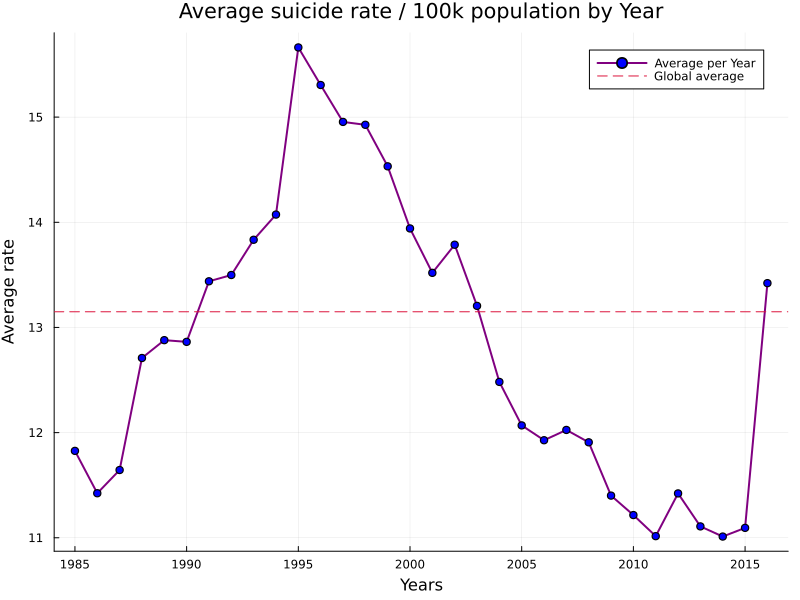

In [54]:
suicide_avg_by_year = combine(
    groupby(df, :year),
    :"suicides/100k pop" => mean => :"suicide_rate_avg/100k pop"
)

plot(suicide_avg_by_year.year,
    suicide_avg_by_year."suicide_rate_avg/100k pop",
     title="Average suicide rate / 100k population by Year",
     xlabel="Years",
     ylabel="Average rate",
     label="Average per Year",
     lw=2,
     linecolor=:purple,
     marker=:circle,
     markersize=4,
     markercolor=:blue,
     size=(800, 600)
)

suicide_avg_per_100k = sum(df.suicides_no) / sum(df.population) * 100_000
hline!([suicide_avg_per_100k], linestyle=:dash, color=:crimson, label="Global average")

Early observations:

- Since 1985, the average number of suicides per 100,000 people has increased, but this increase peaked in 1995 and has declined for 20 years.
- In 2015 there was a sudden increase in this metric
- Lower bound: ~11
- Upper bound: ~15
- Average: ~13

[Back to top](#Suicide-report)